#              21AIE205 – PYTHON FOR MACHINE LEARNING
#       PREDICTION OF HEART FAILURE
#       PHASE – 1
#       Project by Group – 5


# Name: AKARSH S NAIR
# Roll No: AM.EN.U4AIE21008

## Importing the required packages 

In [331]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import*

## Reading the data

In [332]:
data=pd.read_csv("https://raw.githubusercontent.com/akarshsnair/Dataset-cart/main/heart%20(1).csv")

## DATA SUMMARIZATION

In [333]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122.0,N,0.0,Up,0


In [334]:
#getting the datatype of the each attributes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           917 non-null    float64
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


In [335]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [336]:
data.shape

(918, 12)

In [337]:
#statical analysis of data
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,917.000000,918.000000,917.000000,917.000000,918.000000
mean,53.510893,132.396514,198.701200,0.233115,136.779716,0.888332,0.553377
std,9.432617,18.514154,109.403205,0.423046,25.458364,1.066749,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [338]:
#check if there is null values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       1
FastingBS         0
RestingECG        0
MaxHR             1
ExerciseAngina    1
Oldpeak           1
ST_Slope          0
HeartDisease      0
dtype: int64

In [339]:
#removing the null values
data=data.dropna(axis=0)

In [340]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122.0,N,0.0,Up,0


In [341]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [342]:
#converting the object datatype into string
string_col = data.select_dtypes(include="object").columns
data[string_col]=data[string_col].astype("string")

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [343]:
data.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG         string
MaxHR             float64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

In [344]:
string_col=data.select_dtypes("string").columns.to_list()

In [345]:
num_col=data.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [346]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,915.0,53.511475,9.425316,28.0,47.0,54.0,60.0,77.0
RestingBP,915.0,132.421858,18.515567,0.0,120.0,130.0,140.0,200.0
Cholesterol,915.0,198.915847,109.325216,0.0,173.5,223.0,267.0,603.0
FastingBS,915.0,0.231694,0.422145,0.0,0.0,0.0,0.0,1.0
MaxHR,915.0,136.818579,25.469119,60.0,120.0,138.0,156.0,202.0
Oldpeak,915.0,0.889945,1.064561,-2.6,0.0,0.6,1.5,6.2
HeartDisease,915.0,0.553005,0.497454,0.0,0.0,1.0,1.0,1.0


### statical analysis of the data with heart Disease

In [347]:

pos_data = data[data['HeartDisease']==1]
pos_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.0
mean,55.901186,134.221344,176.065217,0.332016,127.689723,1.278656,1.0
std,8.702914,19.819543,126.298960,0.471403,23.419983,1.147282,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.750000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


### statical analysis of the data without heart Disease

In [348]:
neg_data = data[data['HeartDisease']==0]
neg_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.0
mean,50.555012,130.195599,227.185819,0.107579,148.112469,0.409046,0.0
std,9.456170,16.516951,74.714848,0.310228,23.303350,0.700274,0.0
min,28.000000,80.000000,0.000000,0.000000,69.000000,-1.100000,0.0
25%,43.000000,120.000000,197.000000,0.000000,134.000000,0.000000,0.0
50%,51.000000,130.000000,227.000000,0.000000,150.000000,0.000000,0.0
75%,57.000000,140.000000,267.000000,0.000000,165.000000,0.600000,0.0
max,76.000000,190.000000,564.000000,1.000000,202.000000,4.200000,0.0


## DATA VISUALISATION  AND DATA PREPROCESSING:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



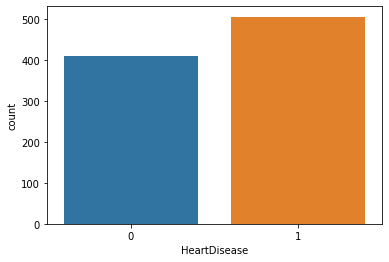

In [349]:
sns.countplot(data['HeartDisease'],label="count")

### corelation of each attributes

In [350]:
# get the correlation
data.iloc[:,0:12].corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.251974,-0.099623,0.198139,-0.381474,0.255177,0.282163
RestingBP,0.251974,1.000000,0.097721,0.071887,-0.111702,0.160958,0.108159
Cholesterol,-0.099623,0.097721,1.000000,-0.260541,0.236850,0.045215,-0.232610
FastingBS,0.198139,0.071887,-0.260541,1.000000,-0.128680,0.055342,0.264475
MaxHR,-0.381474,-0.111702,0.236850,-0.128680,1.000000,-0.160355,-0.398890
Oldpeak,0.255177,0.160958,0.045215,0.055342,-0.160355,1.000000,0.406356
HeartDisease,0.282163,0.108159,-0.232610,0.264475,-0.398890,0.406356,1.000000


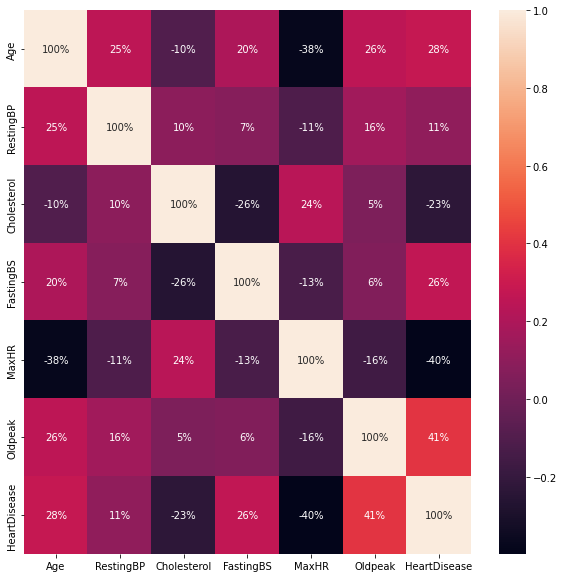

In [351]:
# visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,0:12].corr(),annot=True,fmt=".0%")

#### Histogram plot 

In [352]:
fig=px.histogram(data, x="HeartDisease",color="Sex",hover_data=data.columns,title="Distribution of Heart Diseases",barmode="group")
fig.show()

In [353]:
fig=px.histogram(data,x="ChestPainType",color="Sex",hover_data=data.columns,title="Types of Chest Pain")
fig.show()

#### pairplot

[]

<Figure size 1080x720 with 0 Axes>

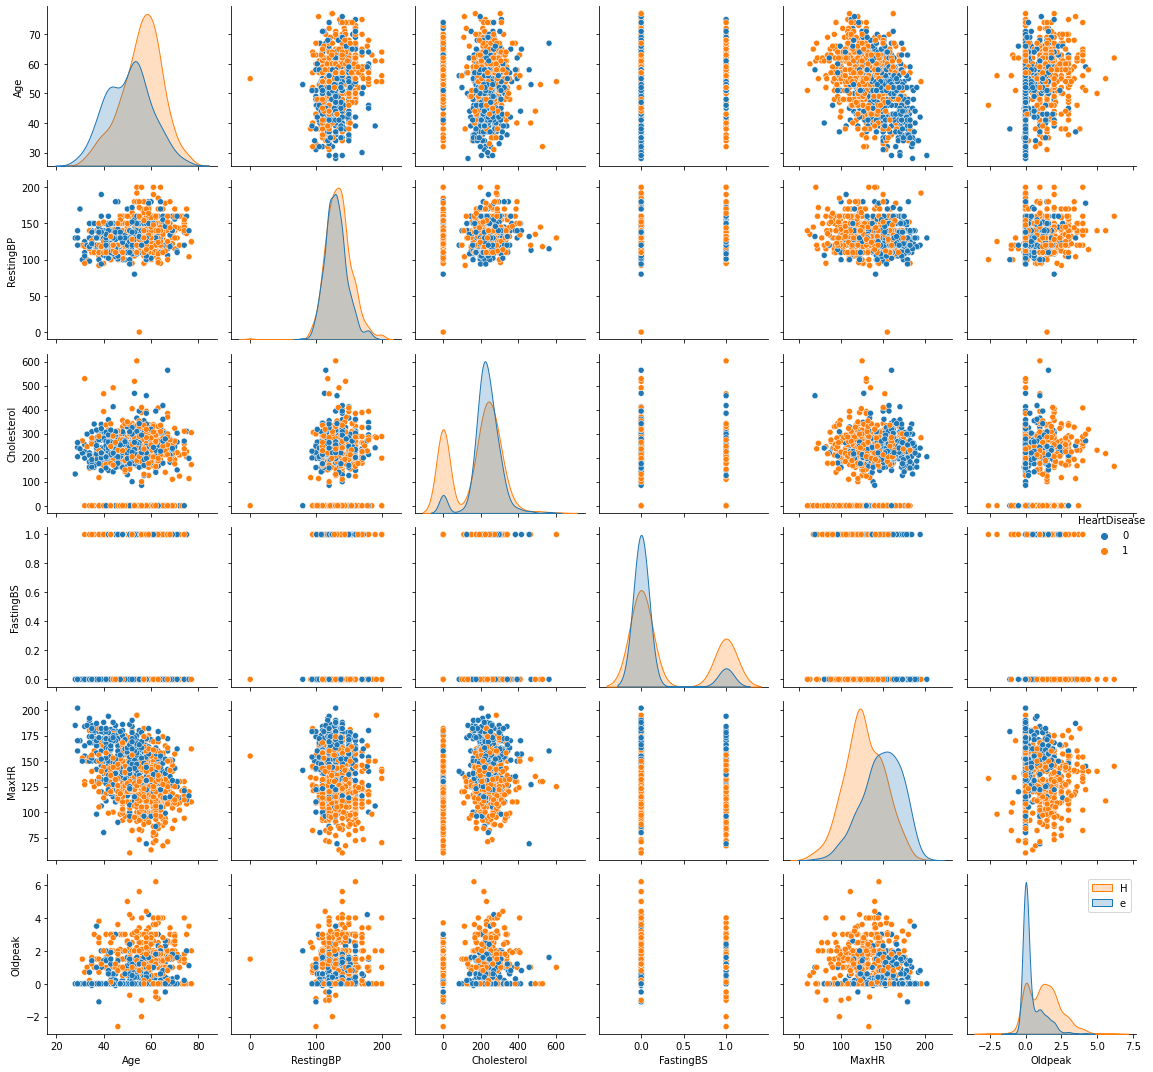

In [354]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="HeartDisease")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

#### Scatter plot

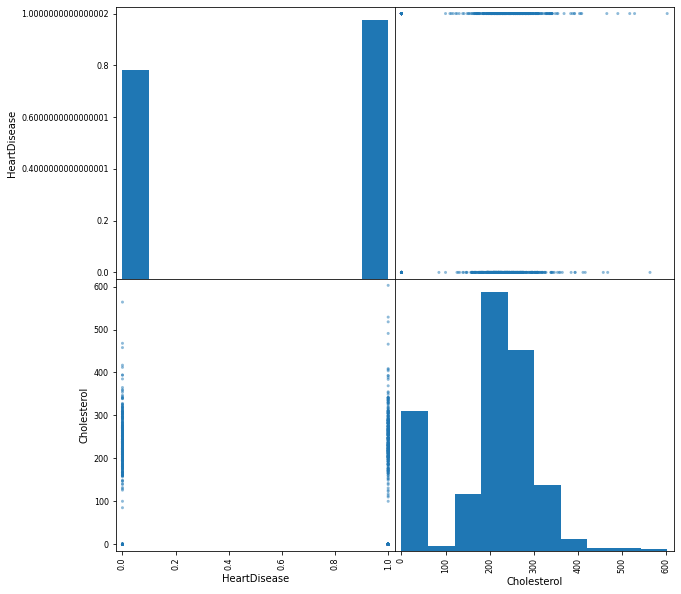

In [355]:
scatter_matrix(data[["HeartDisease","Cholesterol"]],figsize=(10,10))
plt.show()

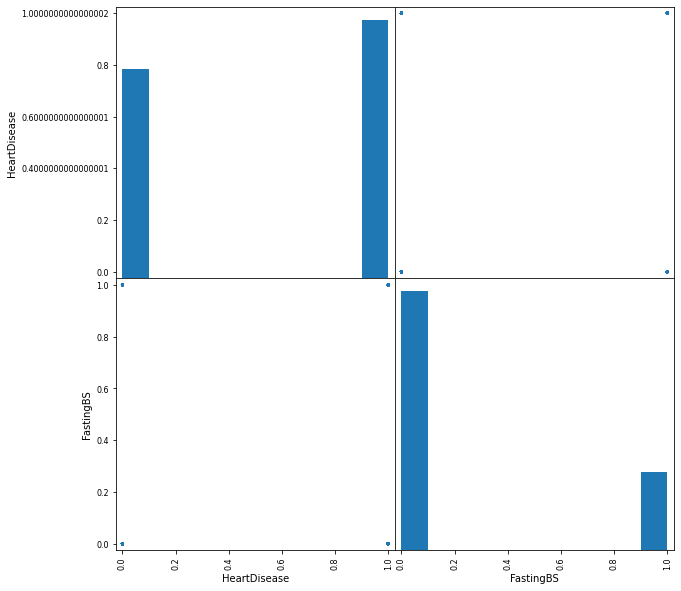

In [356]:
scatter_matrix(data[["HeartDisease","FastingBS"]],figsize=(10,10))
plt.show()

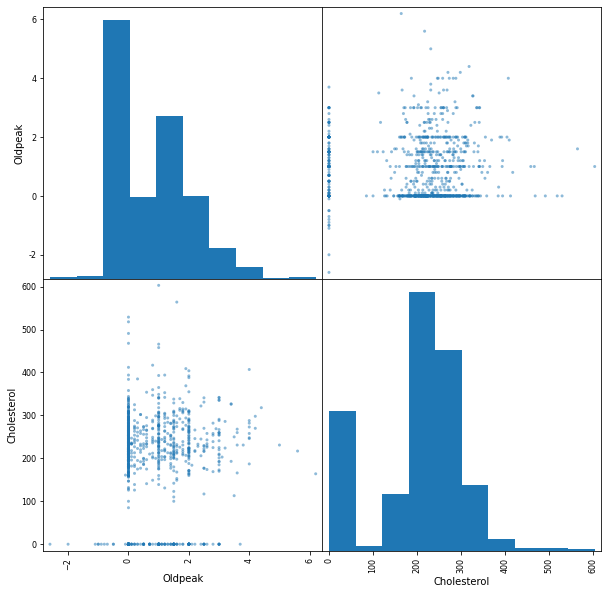

In [357]:
scatter_matrix(data[["Oldpeak","Cholesterol"]],figsize=(10,10))
plt.show()

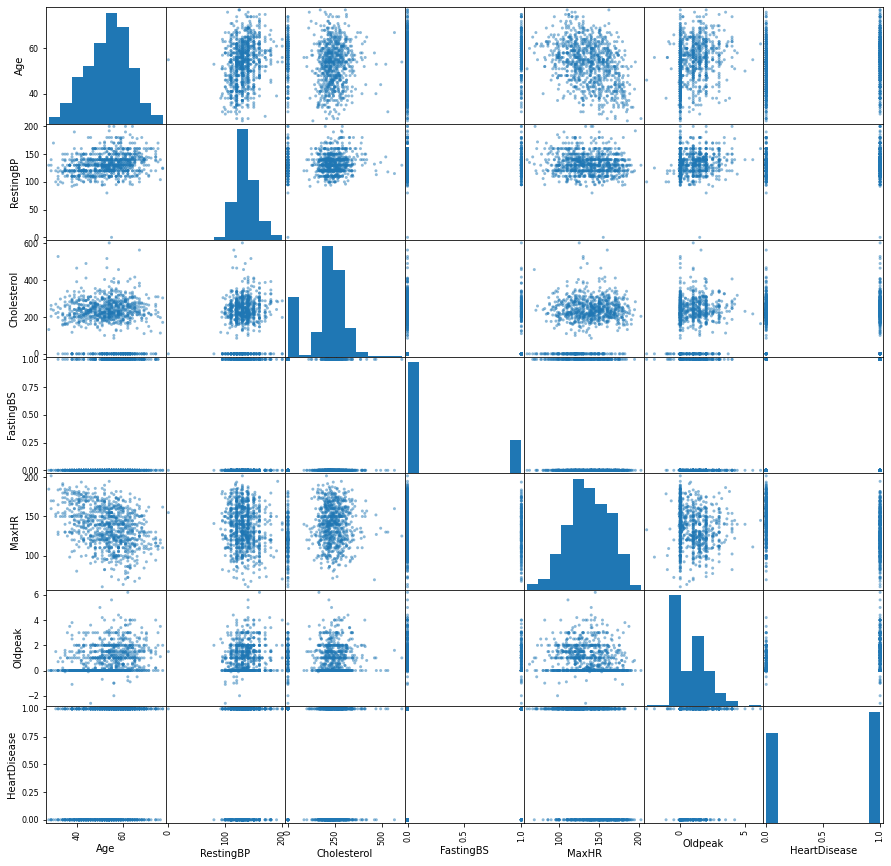

In [358]:
scatter_matrix(data,figsize=(15,15))
plt.show()

#### histogram plot

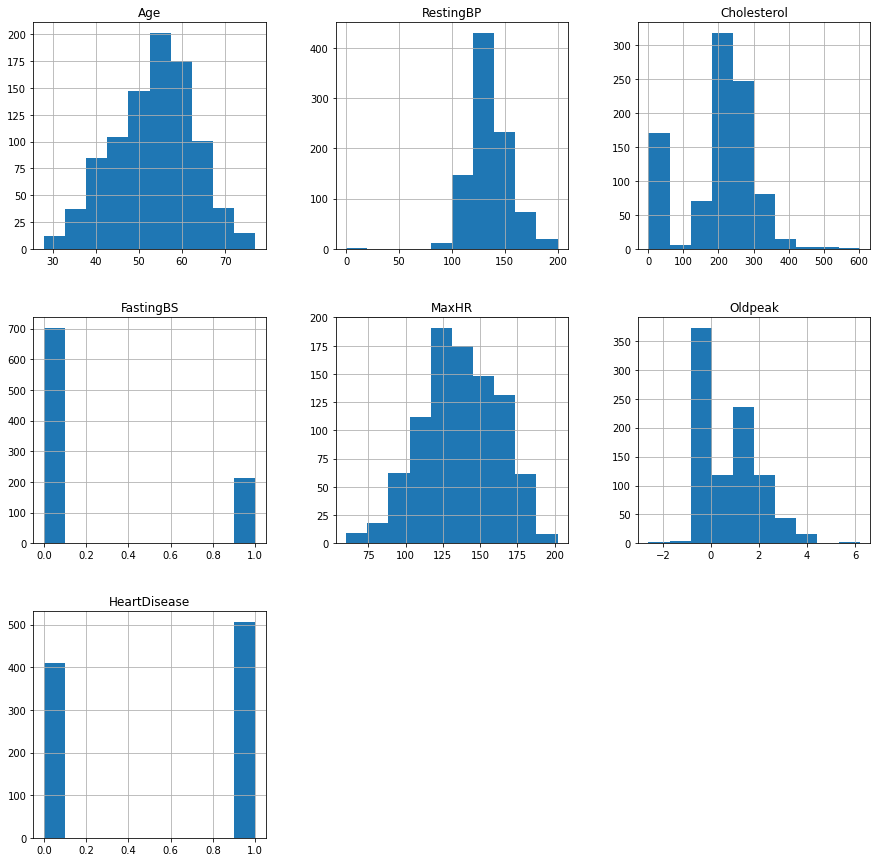

In [359]:
data.hist(figsize=(15,15))
plt.show()

In [360]:
plot = px.bar(data, x = 'Age', y = 'HeartDisease', title = 'Heart Disease acroos All Ages', labels = {'Age': 'Age', 'HeartDisease': 'Heart Disease '}, height = 1000)
plot.show()

####Pie plot

In [361]:
plot = px.pie(data, values = 'HeartDisease', names = 'Sex', title = 'Heart Disease across both Genders')
plot.show()

In [362]:
plot = px.pie(data, values = 'HeartDisease', names = 'ChestPainType')
plot.show()

In [363]:
plot = px.pie(data, values = 'HeartDisease', names = 'RestingECG', 
       title = 'ECG Characteristics during Heart Disease')
plot.show()

#### violin Plot

In [364]:
plot = px.violin(data, x = 'HeartDisease', y = 'RestingBP', color = 'HeartDisease', points = 'all',labels = {'HeartDisease': 'Heart Failure', 'RestingBP': 'Resting Blood Pressure'}, title = 'Variations of BP during Heart Failure', height = 1000,box=True)
plot.show()

In [365]:
plot = px.violin(data, x = 'HeartDisease', y = 'Cholesterol', color = 'HeartDisease', points = 'all',labels = {'HeartDisease': 'Heart Failure', 'Cholesterol': 'Cholesterol'}, title = 'Variations of Cholestrol Levels during Heart Failures', height = 1000,box=True)
plot.show()

#### Box plot

In [366]:
fig = px.box(data,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [367]:
fig = px.box(data,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

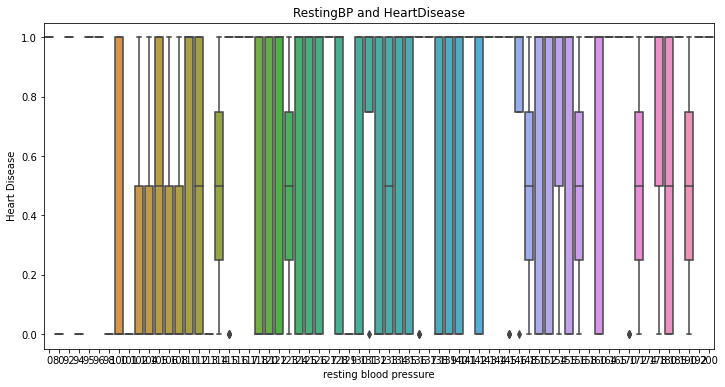

In [368]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='RestingBP', y='HeartDisease')
plt.title("RestingBP and HeartDisease")
plt.xlabel('resting blood pressure')
plt.ylabel("Heart Disease")
plt.show()

In [369]:
count = [0, 0, 0]

for slope, i in zip(data['ST_Slope'], data['HeartDisease']):
    if i == 1 and slope == 'Flat':
        count[0] += 1

    elif i == 1 and slope == 'Up':
        count[1] += 1

    elif i == 1 and slope == 'Down':
        count[2] += 1

st_slope = dict(Slopes=["Flat", 'Upsloping', 'Downsloping'], num = count)
plot = px.funnel(st_slope, x = 'num', y = 'Slopes')
plot.show()

In [370]:
for col in data.columns:
    if data[col].dtype == 'string':
        data[col] = LabelEncoder().fit_transform(data[col])

In [371]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172.0,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156.0,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98.0,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108.0,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122.0,0,0.0,2,0


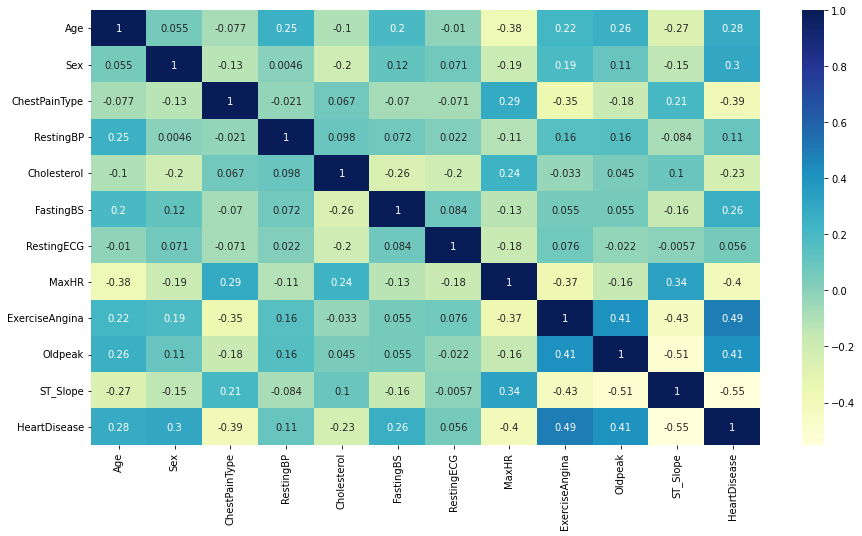

In [372]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(), cmap = 'YlGnBu', annot = True)

In [373]:
data[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(data[col].value_counts())

The distribution of categorical valeus in the Sex is : 
1    723
0    192
Name: Sex, dtype: int64
The distribution of categorical valeus in the ChestPainType is : 
0    494
2    203
1    172
3     46
Name: ChestPainType, dtype: int64
The distribution of categorical valeus in the RestingECG is : 
1    550
0    188
2    177
Name: RestingECG, dtype: int64
The distribution of categorical valeus in the ExerciseAngina is : 
0    546
1    369
Name: ExerciseAngina, dtype: int64
The distribution of categorical valeus in the ST_Slope is : 
1    458
2    394
0     62
3      1
Name: ST_Slope, dtype: int64


In [374]:
from sklearn import preprocessing
import numpy as np

# normalize the data attributes
normalized = preprocessing.normalize(data)
print("Normalized Data = ", normalized)

Normalized Data =  [[0.10914468 0.00272862 0.00272862 ... 0.         0.00545723 0.        ]
 [0.16832129 0.         0.00687026 ... 0.00343513 0.00343513 0.00343513]
 [0.11260201 0.0030433  0.0030433  ... 0.         0.0060866  0.        ]
 ...
 [0.25354266 0.00444812 0.         ... 0.00533774 0.00444812 0.00444812]
 [0.1749718  0.         0.00306968 ... 0.         0.00306968 0.00306968]
 [0.13347555 0.00351251 0.00702503 ... 0.         0.00702503 0.        ]]


In [375]:
xdf=data.drop("HeartDisease",axis=1)
ydf=data["HeartDisease"]
x_train,x_test,y_train,y_test=train_test_split(xdf,ydf,test_size=0.35,random_state=20)

In [376]:
mms=MinMaxScaler(feature_range=(0,1))
x_train=mms.fit_transform(x_train)
x_test=mms.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

## Downloading the cleaned data set

In [383]:
data.to_csv("new_dataset.csv")

## DATA INTERPRETATION

### *Data contains 11 atributes
### * The dataset , was containing null values . Thse null values could effect the predection, So we have to clear those unwanted data
### * The data also contains the string datatype which comes under the st_slope attributes, this  values should be changed to interger , So here i have changed the st_slope attributes value of flat , up,down into 0,1,2  respectively.
### *Normalization is done to make the value of the data's between 0 and 1
### * Data contains 11 atributes

In [381]:
%%shell
jupyter nbconvert --to html ///content/21008_akarsh_heartfailure_.ipynb

[NbConvertApp] Converting notebook ///content/21008_akarsh_heartfailure_.ipynb to html
[NbConvertApp] Writing 1834654 bytes to ///content/21008_akarsh_heartfailure_.html
